# Import Data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata 
print(breast_cancer_wisconsin_original.metadata)

# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [4]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [5]:
X.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object

In [7]:
y.dtypes

Class    int64
dtype: object

In [4]:
len(X), len(y)

(699, 699)

# Import tools

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# EDA

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [21]:
X, y

(     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
 0                  5                        1                         1   
 1                  5                        4                         4   
 2                  3                        1                         1   
 3                  6                        8                         8   
 4                  4                        1                         1   
 ..               ...                      ...                       ...   
 694                3                        1                         1   
 695                2                        1                         1   
 696                5                       10                        10   
 697                4                        8                         6   
 698                4                        8                         8   
 
      Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
 0               

In [13]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
flags = X.isna()
flags.sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

### Merge feature and the target via index

In [7]:
data = X.copy()

In [19]:
data_new = pd.merge(data, y, left_index=True, right_index=True)

In [20]:
data_new

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [22]:
data_new.keys()[-1]

'Class'

## We find the missing value, so that we have to do the data preprocessing

In [8]:
data.Bare_nuclei.agg(['mean', 'median', 'std', 'max', 'min'])

mean       3.544656
median     1.000000
std        3.643857
max       10.000000
min        1.000000
Name: Bare_nuclei, dtype: float64

<Axes: xlabel='Bare_nuclei'>

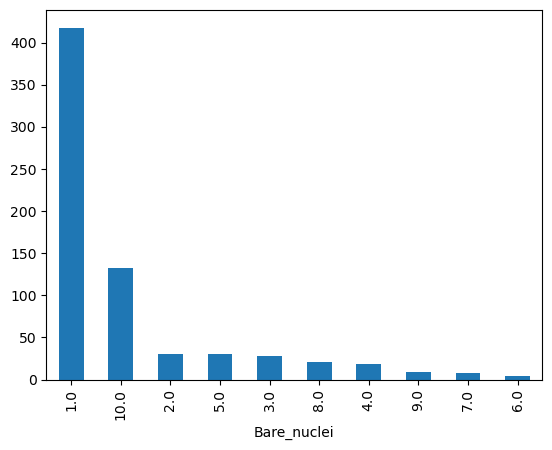

In [30]:
data.Bare_nuclei.value_counts().plot(kind='bar')

In [31]:
import matplotlib.pyplot as plt

def plot_pdf(data: pd.DataFrame, attribute: str):
    df = pd.DataFrame(data)

    df_mean = np.mean(df[attribute])
    df_std = np.std(df[attribute])

    # Calculating probability density function (PDF)
    pdf = stats.norm.pdf(df[attribute].sort_values(), df_mean, df_std)

    plt.plot(df[attribute].sort_values(), pdf)
    plt.xlim([-10, 15])
    plt.xlabel(attribute, size=12)
    plt.ylabel('density', size=12)
    plt.grid(True, alpha=0.3, linestyle="--")
    plt.show()

In [32]:
def plot_gaussian_func(data: pd.DataFrame, attribute: str):
    mu = np.mean(data[attribute])
    sigma = np.std(data[attribute])
    splits = 2

    # define the normal distribution and PDF
    dist = stats.norm(loc=mu, scale=sigma)
    x = np.linspace(dist.ppf(.001), dist.ppf(.999))
    y = dist.pdf(x)

    # calculate PPFs
    step = 1 / splits
    quantiles = np.arange(step, 1.0 - step / 2, step)
    ppfs = dist.ppf(quantiles)  # boundaries

    # plot results
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x, y, color='k')
    for i, ppf in enumerate(ppfs):
        ax.axvline(ppf, color=f'C{i}', label=f'{quantiles[i]:.3f}: {ppf:.1f}')
    ax.legend()
    plt.show()

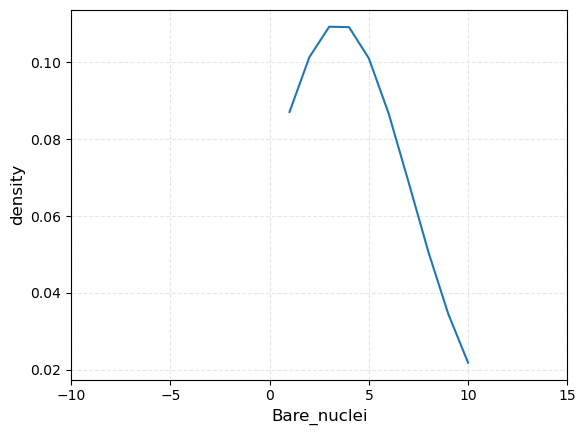

In [33]:
plot_pdf(data, 'Bare_nuclei')

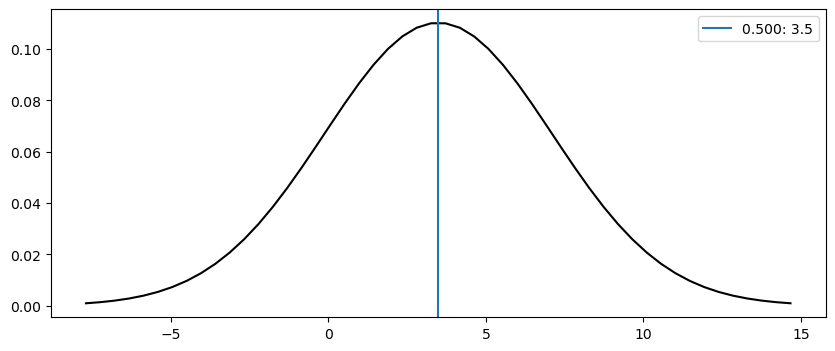

In [34]:
plot_gaussian_func(data, 'Bare_nuclei')

### After standardizing, I get that median = 1 is very dominance for 'Bare_nuclei' value. Thus using the mean value for missing feature is seem to be a good appaorch.

In [ ]:
flags = (data['Bare_nuclei'].isna())
data.loc[flags, 'Bare_nuclei'] = 1

In [37]:
data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


## After using PDF and PPF for preprocessing, the result seem to dominate on value 1. Therefore, I will use standardization for the data.

### But we have to split the dataset for train and test

In [36]:
from sklearn.model_selection import train_test_split

labels = y['Class']

X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)
X_train.count(), X_test.count()

(Clump_thickness                419
 Uniformity_of_cell_size        419
 Uniformity_of_cell_shape       419
 Marginal_adhesion              419
 Single_epithelial_cell_size    419
 Bare_nuclei                    419
 Bland_chromatin                419
 Normal_nucleoli                419
 Mitoses                        419
 dtype: int64,
 Clump_thickness                280
 Uniformity_of_cell_size        280
 Uniformity_of_cell_shape       280
 Marginal_adhesion              280
 Single_epithelial_cell_size    280
 Bare_nuclei                    280
 Bland_chromatin                280
 Normal_nucleoli                280
 Mitoses                        280
 dtype: int64)

### Normalize X_test and X_train

In [41]:
# นิยามฟังก์ชันที่เองชื่อ normalize
def normalize(col):
    # ตัวแปรชื่อ col ที่รับมาจาก apply จะเป็นเพียงคอลัมน์ ๆ หนึ่งของ X_train
    return (col - col.mean())/col.std(ddof=0) # Standardization

new_X_train = X_train.apply(normalize)
new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.785449,2.736402,-0.614245,-0.349261
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.699026,-0.571358,-0.614245,-0.349261
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.984828,-0.614245,-0.349261
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.699026,-0.571358,-0.614245,-0.349261
...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.405185,1.495992,0.353306,0.901511
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.405185,-0.571358,-0.614245,0.276125


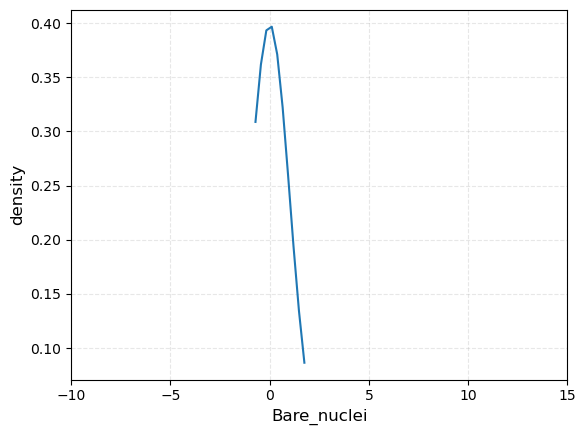

In [66]:
plot_pdf(new_X_train, 'Bare_nuclei')

### After plotting gaussian function, we know that the normalize is doing its work

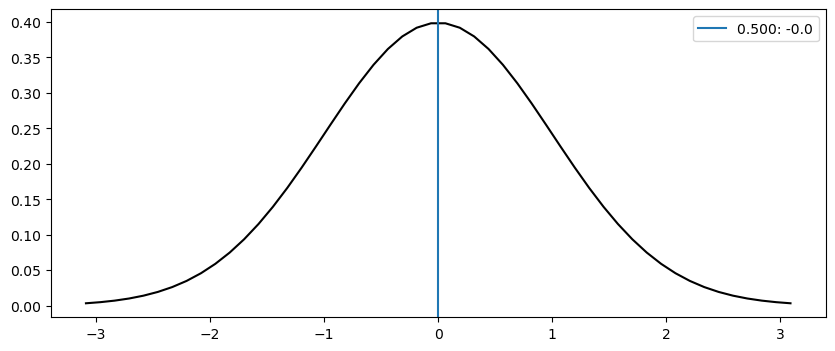

In [67]:
plot_gaussian_func(new_X_train, 'Bare_nuclei')

In [42]:
new_X_test = X_test.apply(normalize)
new_X_test

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
173,0.541130,2.326362,2.344188,2.729381,2.130759,1.821531,2.632460,2.416180,2.866099
558,-0.855335,-0.712742,-0.729357,-0.642207,-0.579063,-0.669114,-0.618207,-0.608546,-0.339658
515,-0.157102,2.326362,0.295158,1.605518,-0.127426,1.821531,2.226127,2.416180,-0.339658
280,-0.506219,-0.712742,-0.729357,-0.642207,-0.579063,-0.669114,-0.211874,-0.608546,-0.339658
234,-0.506219,-0.037386,-0.387852,-0.642207,-0.127426,-0.669114,-0.211874,1.071857,-0.339658
...,...,...,...,...,...,...,...,...,...
443,-1.204451,-0.712742,-0.729357,-0.642207,-0.579063,-0.392375,-1.024541,-0.608546,-0.339658
454,-0.855335,-0.037386,-0.729357,-0.642207,-0.127426,-0.669114,-1.024541,-0.608546,-0.339658
464,-0.157102,-0.712742,-0.729357,-0.642207,-0.579063,-0.669114,-1.024541,-0.608546,-0.339658
5,1.239363,2.326362,2.344188,1.980139,1.679122,1.821531,2.226127,1.407938,-0.339658


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
w = model.coef_
b = model.intercept_
print(f'สมการคือ f(x) = {w}*x + {b}')

สมการคือ f(x) = [[ 0.06438575  0.03897254  0.02250181 -0.0035381  -0.00465739  0.10713917
   0.05102723  0.05624999  0.0026541 ]]*x + [1.51467011]


In [46]:
[ 0.06438575,  0.03897254,  0.02250181, -0.0035381,  -0.00465739,  0.10713917,
  0.05102723,  0.05624999,  0.0026541 ]*X_train + 1.51467011

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
203,1.836599,1.553643,1.537172,1.511132,1.505355,1.621809,1.667752,1.57092,1.517324
608,1.836599,1.904396,1.739688,1.479289,1.468096,2.586062,2.024942,1.57092,1.517324
314,1.579056,1.553643,1.537172,1.511132,1.510013,1.621809,1.616725,1.57092,1.517324
477,1.772213,1.553643,1.537172,1.511132,1.505355,1.621809,1.565697,1.57092,1.517324
70,1.836599,1.553643,1.582176,1.511132,1.505355,1.621809,1.616725,1.57092,1.517324
...,...,...,...,...,...,...,...,...,...
176,1.643442,1.553643,1.537172,1.511132,1.505355,1.621809,1.667752,1.57092,1.517324
258,1.707827,1.553643,1.537172,1.511132,1.505355,1.621809,1.667752,1.57092,1.517324
32,2.158528,1.787478,1.672183,1.504056,1.477411,2.050366,1.871861,1.73967,1.522632
553,1.772213,1.670560,1.559674,1.511132,1.505355,2.050366,1.616725,1.57092,1.519978


In [47]:
y_train_predict = model.predict(X_train)  # ทำนาย training set ให้ผลลัพธ์เหมือนการคำนวณจากสมการโดยตรง
y_train_predict

array([[2.20434527],
       [4.00995555],
       [1.90043244],
       [2.03790506],
       [2.19832166],
       [2.22684708],
       [2.390299  ],
       [1.97351931],
       [2.09521462],
       [2.34048099],
       [2.08893229],
       [2.74974853],
       [3.49593562],
       [2.17581985],
       [4.30043732],
       [1.9781767 ],
       [4.49647992],
       [4.1820246 ],
       [2.00291422],
       [3.70556976],
       [1.83767163],
       [1.9601608 ],
       [4.46663454],
       [1.84474782],
       [2.02997012],
       [2.19620951],
       [4.45545386],
       [3.86296936],
       [2.02454654],
       [3.44045896],
       [1.88975144],
       [3.55153889],
       [2.09521462],
       [2.20956803],
       [1.89577505],
       [1.84474782],
       [2.13995952],
       [2.1980803 ],
       [1.97975121],
       [3.12504329],
       [3.90354947],
       [1.90043244],
       [1.94680228],
       [1.84940521],
       [4.2966941 ],
       [2.88487917],
       [3.5329296 ],
       [2.024

In [48]:
# สร้าง copy ใหม่ของ X_train เพราะไม่ต้องการยุ่งกับ X_train ต้นฉบับ เพื่อป้องกันกรณีที่เผลอแก้ค่าใน comparison แล้วค่าใน X_train เปลี่ยนตาม
comparison = X_train.copy()

# เพิ่มคอลัมน์ sepal length ที่เป็นค่าตัวแปรตามที่แท้จริงเข้าไป
# Note: ทำได้ เพราะ X_train กับ y_train มี index เหมือนกันเป๊ะ
comparison['class'] = y_train

# เพิ่มคอลัมน์ผลการทำนาย
# Note: ทำได้ไม่ผิด เพราะแม้ว่า y_train_predict จะเป็น Numpy array ที่ไม่มี index เดิมของ y_train
#       แต่ตอนทำนายด้วย model.predict() นั้น ไม่ได้มีการสลับลำดับแถว
comparison['class_predict'] = y_train_predict

comparison

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class,class_predict
203,5,1,1,1,2,1.0,3,1,1,2,2.204345
608,5,10,10,10,10,10.0,10,1,1,4,4.009956
314,1,1,1,1,1,1.0,2,1,1,2,1.900432
477,4,1,1,1,2,1.0,1,1,1,2,2.037905
70,5,1,3,1,2,1.0,2,1,1,2,2.198322
...,...,...,...,...,...,...,...,...,...,...,...
176,2,1,1,1,2,1.0,3,1,1,2,2.011188
258,3,1,1,1,2,1.0,3,1,1,2,2.075574
32,10,7,7,3,8,5.0,7,4,3,4,3.666823
553,4,4,2,1,2,5.0,2,1,2,2,2.659562


In [53]:
# คำนวณผลต่างของการทำนาย ยกกำลังสอง
comparison['Error^2'] = (comparison['class'] - comparison['class_predict'])**2  # Error ยกกำลังสอง
# comparison.head()

mse = comparison['Error^2'].mean()
print(f'MSE จากการคำนวณเอง = {mse}')

MSE จากการคำนวณเอง = 0.11551525645194319


# Build My Neural Network

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from NNfunctions import *

In [3]:
Eplt = []
W = np.zeros((2, 9)) # pre-allocate matrix for inserting weight

for i in range(0, 2):
    for j in range(0, 9):
        n = random.uniform(-1, 1)
        W[i, j] = n

array([[ 0.86920406,  0.39844743, -0.87833134,  0.69477238, -0.79129415,
         0.81484246, -0.95601168,  0.96467863,  0.29271968],
       [ 0.14414362,  0.70678219, -0.96458802, -0.57609761,  0.01909605,
        -0.09432903, -0.20559896,  0.77539725,  0.70841047]])

In [ ]:
import torch

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.w = None
        self.b = 0
        
    def forward_propagation(self, X):
        n_samples, n_features = X.shape
        x = np.zeros((n_samples, n_features))
        self.w = torch.from_numpy(x)
        self.b = 0
        
        z = torch.matmul(self.w.T, X) + self.b
        a = sigmoid(z)
        return  a
    
    def backward_propagation(self, a, X, y):
        linear_pred = torch.matmul(self.w.T, X) + self.b
        n_samples, n_features = X.shape
        
        dw = (1/n_samples) * np.dot(X.T, torch.sub(a, y))
        db = (1/n_samples) * np.sum(torch.sub(a, y))
        return dw, db